In [ ]:
x = "1.70000043572e-05"
y = float(x)
print(y)
# Output: 0.0000170000043572



1.70000043572e-05


In [ ]:
import csv
import numpy as np
import select  as sl
from numpy import set_printoptions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from scipy.stats import gaussian_kde
from scipy.stats import probplot

df = pd.read_excel("PCOS.xls", sheet_name=1)

In [ ]:
#Converting object data type to numeric type
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

In [ ]:
#trimming column names where there are extra spaces at start and end
df = df.rename(columns=lambda x: x.strip())

In [ ]:
#dropping axes which are not useful
df = df.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1) #dropping not useful axis

In [ ]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['BMI',
 'Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'Waist:Hip Ratio',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [ ]:
#filling missing values with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median

In [ ]:
df.rename(columns={' Age (yrs)': 'Age'}, inplace=True)
df.rename(columns={' Age (yrs)': ' Age (yrs)'}, inplace=True)
df.rename(columns={'PCOS (Y/N)': 'PCOS'}, inplace=True)

In [ ]:
corr_features=['PCOS', 'FSH(mIU/mL)', 'Follicle No. (L)', 'TSH (mIU/L)','RBS(mg/dl)','Weight gain(Y/N)','Waist:Hip Ratio']

In [ ]:
df1=df[corr_features]

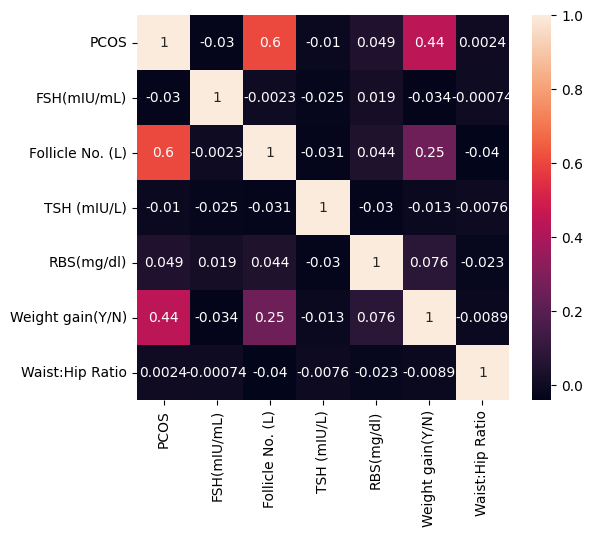

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [ ]:
df1.PCOS.value_counts()
target_name = 'PCOS'
y= df1[target_name]
X= df1.drop(target_name, axis=1)
print(X)
type(df1)

     FSH(mIU/mL)  Follicle No. (L)  TSH (mIU/L)  RBS(mg/dl)  Weight gain(Y/N)  \
0           7.95                 3         0.68        92.0                 0   
1           6.73                 3         3.16        92.0                 0   
2           5.54                13         2.54        84.0                 0   
3           8.06                 2        16.41        76.0                 0   
4           3.98                 3         3.57        84.0                 0   
..           ...               ...          ...         ...               ...   
536        10.06                 1         1.11        92.0                 0   
537         5.07                 9         2.05       108.0                 1   
538        11.96                 1         2.87        92.0                 0   
539         4.40                 7         2.50       115.0                 0   
540         3.99                 9         1.66       108.0                 1   

     Waist:Hip Ratio  
0   

pandas.core.frame.DataFrame

In [ ]:
for i in range (0, len(df1)):
 df1.loc[i,"PCOS"]=y[i]

print(df1.head())
df1.columns

   PCOS  FSH(mIU/mL)  Follicle No. (L)  TSH (mIU/L)  RBS(mg/dl)  \
0     0         7.95                 3         0.68        92.0   
1     0         6.73                 3         3.16        92.0   
2     1         5.54                13         2.54        84.0   
3     0         8.06                 2        16.41        76.0   
4     0         3.98                 3         3.57        84.0   

   Weight gain(Y/N)  Waist:Hip Ratio  
0                 0            0.842  
1                 0            0.842  
2                 0            0.842  
3                 0            0.842  
4                 0            0.842  


Index(['PCOS', 'FSH(mIU/mL)', 'Follicle No. (L)', 'TSH (mIU/L)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'Waist:Hip Ratio'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (362, 6) (362,)
Test (179, 6) (179,)


In [ ]:
cols = df1.columns

df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')
print(df1.dtypes)

PCOS                  int64
FSH(mIU/mL)         float64
Follicle No. (L)      int64
TSH (mIU/L)         float64
RBS(mg/dl)          float64
Weight gain(Y/N)      int64
Waist:Hip Ratio     float64
dtype: object


<ipython-input-15-f202cba91ee8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
X.head(5)
# y.head(5)

,FSH(mIU/mL),Follicle No. (L),TSH (mIU/L),RBS(mg/dl),Weight gain(Y/N),Waist:Hip Ratio
0,7.95,3,0.68,92.0,0,0.842
1,6.73,3,3.16,92.0,0,0.842
2,5.54,13,2.54,84.0,0,0.842
3,8.06,2,16.41,76.0,0,0.842
4,3.98,3,3.57,84.0,0,0.842


In [ ]:
y.head(5)

0    0
1    0
2    1
3    0
4    0
Name: PCOS, dtype: int64

In [ ]:
df2= df1[df1["PCOS"] >= 1]
print(df2)

     PCOS  FSH(mIU/mL)  Follicle No. (L)  TSH (mIU/L)  RBS(mg/dl)  \
2       1         5.54                13         2.54        84.0   
12      1         2.00                15         6.51       125.0   
19      1         1.89                16         2.87       100.0   
24      1         5.34                 4         0.65       100.0   
26      1         6.18                21         4.28       100.0   
..    ...          ...               ...          ...         ...   
520     1         4.56                18         0.86       100.0   
523     1         5.71                 6         2.11       110.0   
524     1         4.30                 9         3.65       107.0   
533     1         3.71                 8         1.40       100.0   
540     1         3.99                 9         1.66       108.0   

     Weight gain(Y/N)  Waist:Hip Ratio  
2                   0            0.842  
12                  1            0.842  
19                  0            0.842  
24     

In [ ]:
df3= df1[df1["PCOS"] < 1]
print(df3)

     PCOS  FSH(mIU/mL)  Follicle No. (L)  TSH (mIU/L)  RBS(mg/dl)  \
0       0         7.95                 3         0.68        92.0   
1       0         6.73                 3         3.16        92.0   
3       0         8.06                 2        16.41        76.0   
4       0         3.98                 3         3.57        84.0   
5       0         3.24                 9         1.60        76.0   
..    ...          ...               ...          ...         ...   
535     0         7.06                 7        17.20        92.0   
536     0        10.06                 1         1.11        92.0   
537     0         5.07                 9         2.05       108.0   
538     0        11.96                 1         2.87        92.0   
539     0         4.40                 7         2.50       115.0   

     Weight gain(Y/N)  Waist:Hip Ratio  
0                   0            0.842  
1                   0            0.842  
3                   0            0.842  
4      

In [ ]:
from scipy import stats
from scipy.stats import gaussian_kde

In [ ]:
def normal_pdf(x, mean, std_dev):
    coefficient = 1 / (std_dev * np.sqrt(2 * np.pi))
    exponent = -((x - mean) ** 2) / (2 * std_dev ** 2)
    return coefficient * np.exp(exponent)

In [ ]:
y_train.head(10)

242    0
95     1
122    1
472    1
23     0
164    0
13     0
61     1
502    0
507    0
Name: PCOS, dtype: int64

In [ ]:
X_test.head(5)

,FSH(mIU/mL),Follicle No. (L),TSH (mIU/L),RBS(mg/dl),Weight gain(Y/N),Waist:Hip Ratio
499,6.50,8,1.83,100.0,0,0.842
486,7.59,16,3.58,116.0,0,0.842
65,4.76,2,2.45,100.0,0,0.842
41,5.60,8,0.93,92.0,0,0.842
326,5.27,2,3.69,100.0,0,0.842


In [ ]:
y_test.head(5)

499    0
486    1
65     0
41     0
326    0
Name: PCOS, dtype: int64

In [ ]:
X_train.head(10)

,FSH(mIU/mL),Follicle No. (L),TSH (mIU/L),RBS(mg/dl),Weight gain(Y/N),Waist:Hip Ratio
242,1.32,6,2.00,113.0,1,0.842
95,2.00,6,2.78,107.0,1,0.842
122,4.14,6,2.90,92.0,1,0.842
472,5.05,12,1.27,92.0,1,0.842
23,6.41,6,0.45,92.0,0,0.842
164,7.72,2,5.51,108.0,1,0.842
13,4.84,3,1.48,91.0,0,0.842
61,1.46,9,0.44,107.0,1,0.842
502,6.81,3,1.22,100.0,0,0.842
507,8.06,6,1.74,107.0,0,0.842


In [ ]:
y_test_1_count = 0
for i in y_test:
  if i==1:
    y_test_1_count=y_test_1_count+1
print(y_test_1_count)
print(y_test.count()-y_test_1_count)


54
125


In [ ]:
sample_df=pd.concat([X_train, y_train], axis=1)
test_df=pd.concat([X_test, y_test], axis=1)

In [ ]:
# I AM CREATING df0 WITH ALL TARGET = 0
sample_df0 = sample_df[sample_df['PCOS'] == 0]

# I AM CREATING df1 WITH ALL TARGET = 1
sample_df1 = sample_df[sample_df['PCOS'] == 1]

In [ ]:
sample_df0.head(5)

,FSH(mIU/mL),Follicle No. (L),TSH (mIU/L),RBS(mg/dl),Weight gain(Y/N),Waist:Hip Ratio,PCOS
242,1.32,6,2.00,113.0,1,0.842,0
23,6.41,6,0.45,92.0,0,0.842,0
164,7.72,2,5.51,108.0,1,0.842,0
13,4.84,3,1.48,91.0,0,0.842,0
502,6.81,3,1.22,100.0,0,0.842,0


In [ ]:
test_df['PCOS']

499    0
486    1
65     0
41     0
326    0
      ..
433    0
324    0
527    0
273    0
423    0
Name: PCOS, Length: 179, dtype: int64

In [ ]:
test_df['FSH(mIU/mL)']

499    6.50
486    7.59
65     4.76
41     5.60
326    5.27
       ... 
433    4.09
324    6.20
527    4.36
273    6.30
423    2.97
Name: FSH(mIU/mL), Length: 179, dtype: float64

In [ ]:
# Import statistics library
import statistics

In [ ]:
# Define a sample data set
data0 = sample_df0['FSH(mIU/mL)']
data1 = sample_df1['FSH(mIU/mL)']

# Calculate the sample standard deviation
fsh_sd0 = statistics.stdev(data0)
fsh_sd1 = statistics.stdev(data1)

# Calculate the population standard deviation
# population_sd = statistics.pstdev(data)

# Print the results
print("Sample standard deviation for PCOS = N:", fsh_sd0)
print("Sample standard deviation for PCOS = Y:", fsh_sd1)
# print("Population standard deviation:", population_sd)

Sample standard deviation for PCOS = N: 4.213148986561981
Sample standard deviation for PCOS = Y: 2.4454317994427304


In [ ]:
fsh_mean0=sample_df0['FSH(mIU/mL)'].mean()
fsh_mean1=sample_df1['FSH(mIU/mL)'].mean()
print(fsh_mean0)
print(fsh_mean0)

5.468192468619248
5.468192468619248


In [ ]:
import math

In [ ]:
fsh_0 = []
for x in test_df['FSH(mIU/mL)']:
  p0=float((1/(fsh_sd0*math.sqrt(2*math.pi)))*math.exp(-((x-fsh_mean0)*(x-fsh_mean0)/2*fsh_sd0*fsh_sd0)))
  fsh_0.append(p0)
print(fsh_0)
x=0

[7.459337645750492e-06, 4.198452389729724e-19, 0.0011044116420360546, 0.08115927657145072, 0.0668186262119293, 6.42418438072738e-24, 6.878955779264746e-17, 0.0, 2.9609812608035444e-15, 2.814700770997428e-50, 0.00013724185330268656, 1.7587835776339657e-56, 7.810615059975018e-69, 3.418171378727585e-26, 6.658840922048027e-34, 6.457223605020069e-15, 4.261627801989745e-05, 0.024243034578888076, 5.1031021903468984e-33, 6.42418438072738e-24, 4.4467508867443786e-18, 3.856228216997552e-17, 2.3979416361903574e-08, 3.4289125942516526e-29, 0.0005031384534218578, 2.3073244673764845e-05, 0.00027293990869496957, 7.48936559630216e-08, 0.0007165650027791518, 0.04679466402868137, 0.05635432928114599, 1.6303880799361557e-05, 0.09468706510308887, 0.051535157662984575, 2.2143988444213255e-48, 0.08300681641389256, 6.39855843732418e-43, 0.00027293990869496957, 1.1137260907169598e-43, 0.00010083903714673584, 1.518190462727102e-20, 3.5348010097883604e-06, 0.006348057235757505, 8.453098351794892e-33, 0.09086131

In [ ]:
fsh_0_max = max(fsh_0)
print(fsh_0_max)

fsh_0_sum=sum(fsh_0)
print(fsh_0_sum)

beeta_fsh_0 = fsh_0_max/fsh_0_sum
print(beeta_fsh_0)

total=362
mass_fsh_0=[]
for y in fsh_0:
  a=y/(fsh_0_sum+(total*(1-fsh_0_max*beeta_fsh_0)))
  mass_fsh_0.append(a)
print(mass_fsh_0)
y=0

0.09468706510308887
1.8931545871145836
0.05001549569568135
[2.05957331070009e-08, 1.1592209521522962e-21, 3.0493548488983408e-06, 0.00022408622304087903, 0.00018449072255381083, 1.7737605296765333e-26, 1.8993259725320267e-19, 0.0, 8.175468477027922e-18, 7.771578202866052e-53, 3.7893399065298854e-07, 4.856119789477753e-59, 2.1565633681753316e-71, 9.437801152541828e-29, 1.83855077951333e-36, 1.7828828817929068e-17, 1.1766641085238728e-07, 6.693664955292922e-05, 1.409000848621084e-35, 1.7737605296765333e-26, 1.2277778377398069e-20, 1.0647305555636478e-19, 6.620878191950076e-11, 9.467458371276858e-32, 1.389199121244927e-06, 6.370678092097269e-08, 7.536054514080403e-07, 2.067864229876603e-10, 1.9784841834401146e-06, 0.0001292032157460451, 0.00015559809468602672, 4.50161118183601e-08, 0.0002614373573315075, 0.00014229203761257728, 6.114104195046696e-51, 0.00022918740484904667, 1.7666850342905845e-45, 7.536054514080403e-07, 3.0750726683859823e-46, 2.7842336605104386e-07, 4.1918260120233054e-2

In [ ]:
fsh_1 = []
for x in test_df['FSH(mIU/mL)']:
  p1=float((1/(fsh_sd1*math.sqrt(2*math.pi)))*math.exp(-((x-fsh_mean1)*(x-fsh_mean1)/2*fsh_sd1*fsh_sd1)))
  fsh_1.append(p1)
print(fsh_1)
x=0

fsh_1_max = max(fsh_1)
print(fsh_1_max)

fsh_1_sum=sum(fsh_1)
print(fsh_1_sum)

beeta_fsh_1 = fsh_1_max/fsh_1_sum
print(beeta_fsh_1)

total=362
mass_fsh_1=[]
for y in fsh_1:
  a=y/(fsh_1_sum+(total*(1-fsh_1_max*beeta_fsh_1)))
  mass_fsh_1.append(a)
print(mass_fsh_1)
y=0

[5.527093767793204e-06, 8.859536429391073e-13, 0.15677571249688768, 0.010650720008835216, 0.05066944111901612, 9.832986809801621e-05, 9.83748652736614e-12, 0.0, 6.006433341743023e-11, 3.734872324474661e-11, 0.1625528729628529, 8.966736706983738e-13, 6.438225005906879e-34, 3.042516461502158e-05, 4.7532452866478186e-07, 0.0070656652978907655, 1.626931811327317e-05, 0.001970130960276892, 7.751769221659195e-07, 9.832986809801621e-05, 0.0017101644985582328, 0.0026348623100551833, 0.08082175931685681, 6.220498566975141e-06, 0.16165063268768864, 0.15324295260679854, 5.4920454212185444e-05, 0.0927295573834811, 0.00010731882747047779, 0.004226566996127562, 0.00547947717716283, 0.1504343842001319, 0.02128057682615115, 0.004818178307302102, 1.1514768542266086e-10, 0.01127354933274678, 2.830333706486496e-09, 5.4920454212185444e-05, 1.820519308483209e-09, 0.16168694669360079, 0.0005282418794335796, 3.5291964369257988e-06, 0.0005704606862445971, 8.746900814940179e-07, 0.02962561234666371, 2.55164972

In [ ]:
fsh_pcos=[]
for i in range(0, len(mass_fsh_1)):
  if(mass_fsh_1[i]>=mass_fsh_0[i]):
    fsh_pcos.append(1)
  else:
    fsh_pcos.append(0)

print(fsh_pcos)

[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


In [ ]:
# y_test
y_test_list=[]
for i in test_df['PCOS']:
  y_test_list.append(i)
print(y_test_list)

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
fsh_count=0
for i in range(0, len(fsh_pcos)):
  if fsh_pcos[i]==y_test_list[i]:
    fsh_count=fsh_count+1
print(fsh_count)

70
